### Title

Machine Learning for Leads Management

### Author

Yusi Chen

### Date

July 10th, 2020

### Project Purpose

Using machine learning algorithms to predict conversion outcome and leads scoring in order to improve conversion rate



### Modules Used

Pandas, Numpy, sklearn, matplotlib

### Presentation

https://drive.google.com/file/d/1_Nd4uLF6fK_VMr6tSU8khOLCHv73KS1Z/view?usp=sharing

### Project Description

Lead Scoring Case Study - Problem Statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

X Education wants a help in selecting the most promising leadd by prioritized leads score. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

# 1. Data cleaning 

## 1.1 Data importing

In [1]:
import pandas as pd
import numpy as np


data1=pd.read_csv('/Users/abc/All Labs/Portfolio/Leads Scoring X Online Education raw dataset.csv')
print('The original dataset consists of',data1.shape[0],'rows and',data1.shape[1],'columns')
data1.head()


The original dataset consists of 9240 rows and 37 columns


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


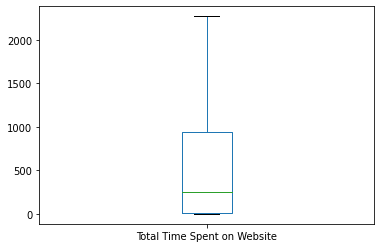

In [2]:
data1['Do Not Email'].value_counts()
data1['Total Time Spent on Website'].value_counts()
data1['Total Time Spent on Website'].plot(kind='box')


## 1.2 Handle missing values

In [3]:
# A glance on the null values in each column
data1.isnull().sum()

'''
As we see, a few columns contains very lage number of missing values. This will make too much 'noise' for model building.
Must clean those columns first.
'''

"\nAs we see, a few columns contains very lage number of missing values. This will make too much 'noise' for model building.\nMust clean those columns first.\n"

### 1.2.1 Remove the columns have very high missing value percentages

In [4]:
# If the % missing values > 60 %, remove the column
remove_threshold = 60
to_remove = []

for c in data1.columns:
    total_records = len(data1[c])
    missing_records = data1[c].isna().sum()
    missing_per = round(missing_records/total_records * 100,2)
    if missing_per > remove_threshold:
        print('Column',c, 'is missing', missing_records, 'of', total_records, 'which is', missing_per, '% of the data, so remove it')
        to_remove.append(c)

data1.drop(to_remove, axis=1, inplace=True)





In [5]:
# Check the missing value percentage of the rest columns and sort them up
round(100*(data1.isnull().sum()/len(data1.index)), 2).sort_values(axis=0, ascending=False)


Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
Tags                                             36.29
What matters most to you in choosing a course    29.32
Lead Profile                                     29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Cal

### 1.2.1 Handle the rest of high missing value columns one by one


#### No.1.Lead Quality

In [6]:
# Lead Quality is a qualitative variable based on the intuition of sales staff on the conversion probability of the leads.
# It is an important indicator despite the high missing value percentage

print(data1['Lead Quality'].value_counts())

data1['Lead Quality'] = data1['Lead Quality'].fillna('No answer')


Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64


#### No.2 Asymmetrique

In [7]:
# Asymmetrique: An index and score assigned to each customer based on their activity and their profile
# Asymmetrique Profile Score                       
# Asymmetrique Activity Score                      
# Asymmetrique Profile Index                       
# Asymmetrique Activity Index 

'''
As these variables have no clear explanation on their impacts on conversion, and the missing value percentage is too high,
it's better to drop them.
'''

data1.drop(['Asymmetrique Profile Score','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Activity Index'], axis=1, inplace=True)





#### No.3 Tags

In [8]:
# Tags assigned to customers indicating the current status of the lead.
# This tags look like the notes taken by salespersons to describe the status of this leads after they call them in an initail stage. 

print(data1['Tags'].value_counts())

# data['Tags'] = data['Tags'].fillna('No answer from sales')
# data['Tags'].replace({'wrong number given':'invalid number',
#                      'number not provided':'invalid number',
#                       'Recognition issue (DEC approval)':'University not recognized',
#                       'Busy':'No response',
#                       'Ringing':'No response',
#                       'switched off':'No response'
#                      },inplace=True) 
# data['Tags']=data['Tags'].str.capitalize()


# status_keep = data['Tags'].value_counts()[:10].index.to_list()    # top10
# status_remove = data['Tags'].value_counts()[10:].index.to_list()  # out of top10
# data['Tags'] = np.where(data['Tags'].isin(status_remove),'Other status',data['Tags'])  

# data['Tags'].value_counts()

data1.drop('Tags', axis=1, inplace=True)


Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

#### No.4 What matters most to you in choosing a course

In [9]:

print(data1['What matters most to you in choosing a course'].value_counts())

# As the values are highly imbalanced, this column doesn not provide any insights to the results, so remove it.
data1.drop('What matters most to you in choosing a course', axis=1, inplace=True)


Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64


####  No.5 Lead Profile

In [10]:

print(data1['Lead Profile'].value_counts())

# As the top selections in Lead Profile is 'Select', and accounts for almost 50% of all selections, it gives no value extract the insight. 
# And the missing value accounts for almost 30%.
# This column can be dropped

data1.drop('Lead Profile', axis=1, inplace=True)


Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64


####  No.6 What is your current occupation

In [11]:
print(data1['What is your current occupation'].value_counts())

# Replace the missing value with 'No answer'
data1['What is your current occupation'] = data1['What is your current occupation'].fillna('No answer')
data1['What is your current occupation'].replace({'Businessman':'Working Professional'},inplace=True) 
data1['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64


Unemployed              5600
No answer               2690
Working Professional     714
Student                  210
Other                     16
Housewife                 10
Name: What is your current occupation, dtype: int64

####  No.7 Country

In [12]:
print(data1['Country'].value_counts())

# Replace the missing value with 'No answer'
data1['Country'] = data1['Country'].fillna('No answer')
data1['Country'] = np.where(data1['Country'] == 'India', 'India', 'Other country')
print(data1['Country'].value_counts())


India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Germany                    4
South Africa               4
Canada                     4
Nigeria                    4
Kuwait                     4
Sweden                     3
Italy                      2
Bangladesh                 2
Uganda                     2
Ghana                      2
Belgium                    2
Philippines                2
China                      2
Asia/Pacific Region        2
Netherlands                2
Sri Lanka                  1
Switzerland                1
Liberia                    1
Kenya                      1
Russia                     1
Denmark                    1
Tanzania      

#### No.8 How did you hear about X Education

In [13]:
print(data1['How did you hear about X Education'].value_counts())

# As this columns is sort of repetitive info with the Source columns. Drop them

data1.drop('How did you hear about X Education',axis=1, inplace=True)

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64


#### No.9 Specialization

In [14]:
print(data1['Specialization'].value_counts())

# 'Select' is meaningless, it is equivalent to 'No answer'. Replace it with 'No answer'.

# Replace the missing value as 'No answer'
data1['Specialization'] = data1['Specialization'].fillna('No answer')
data1['Specialization'].replace({'Select':'No answer',
                                'E-Business':'E-COMMERCE',
                                'Banking, Investment And Insurance':'Finance Management',
                               'Travel and Tourism':'Hospitality Management'},inplace=True)

data1['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64


No answer                    3380
Finance Management           1314
Human Resource Management     848
Marketing Management          838
Operations Management         503
Business Administration       403
IT Projects Management        366
Supply Chain Management       349
Hospitality Management        317
Media and Advertising         203
International Business        178
E-COMMERCE                    169
Healthcare Management         159
Retail Management             100
Rural and Agribusiness         73
Services Excellence            40
Name: Specialization, dtype: int64

####  No.10 City

In [15]:
print(data1['City'].value_counts())

# The distribution of this columns does not provide too much meanings to analyse the specific cities of the leads. Drop this column.

data1.drop('City', axis=1, inplace=True)


Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64


### 1.2.2 Handle the rest of missing values which represents low percentages

In [16]:
# As the rest of columns contains < 2 % missing values, only need to delete the rolls contains missing values and keep those columns.

data1 = data1.dropna()

print(data1.shape)

data1.isnull().sum()

# all missing values are handled.


(9074, 28)


Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                               0
Country                                     0
Specialization                              0
What is your current occupation             0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Receive More Updates About Our Cou

## 1.3 Clean the remaing columns one by one, make sure they are meaningful

In [17]:
# 1. Lead Origin: How does a specific leads imported into the dataset
data1['Lead Origin'].value_counts()

Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64

In [18]:
# 2. Lead Source 
data1['Lead Source'].value_counts()
data1['Lead Source']=data1['Lead Source'].str.title()  # Capitalize each word, merge some choices
data1['Lead Source'] = data1['Lead Source'].map(lambda x: x.replace('_',' '))  # Remove underscore



data1['Lead Source'].replace({'Olark Chat ':'Live Chat',
                                'Welearnblog Home':'Welearn',
                                'Youtubechannel':'Youtube',
                               },inplace=True)



source_keep = data1['Lead Source'].value_counts()[:10].index.to_list()
source_remove = data1['Lead Source'].value_counts()[10:].index.to_list()

data1['Lead Source'] = np.where(data1['Lead Source'].isin(source_remove),
                                     'Other source',data1['Lead Source'])

data1['Lead Source'].value_counts()

Google              2873
Direct Traffic      2543
Olark Chat          1753
Organic Search      1154
Reference            443
Welingak Website     129
Referral Sites       125
Facebook              31
Other source          13
Bing                   6
Click2Call             4
Name: Lead Source, dtype: int64

In [19]:
# 3. Receive More Updates About Our Courses 
data1['Receive More Updates About Our Courses'].value_counts() 
data1.drop('Receive More Updates About Our Courses', axis=1, inplace=True)     # As the only answer is No. Drop this column as it is meaningless.

# 4. Update me on Supply Chain Content
data1['Update me on Supply Chain Content'].value_counts() 
data1.drop('Update me on Supply Chain Content', axis=1, inplace=True) # As the only answer is No. Drop this column as it is meaningless.

# 5. Get updates on DM Content
data1['Get updates on DM Content'].value_counts() 
data1.drop('Get updates on DM Content', axis=1, inplace=True)  # As the only answer is No. Drop this column as it is meaningless.

# 6. I agree to pay the amount through cheque
data1['I agree to pay the amount through cheque'].value_counts() 
data1.drop('I agree to pay the amount through cheque', axis=1, inplace=True) # As the only answer is No. Drop this column as it is meaningless.


In [20]:
# 7. Last Notable Activity  
print(data1['Last Notable Activity'].value_counts())

data1['Last Notable Activity'].replace({'Email Bounced':'Unreachable',
                                      'Page Visited on Website':'Email Link Clicked',
                                       'View in browser link Clicked':'Email Link Clicked',
                                       'Email Received':'Email Opened',
                                       'Form Submitted on Website':'Other',
                                       'Approached upfront':'Other',
                                       'Resubscribed to emails':'Other',
                                       'Email Marked Spam':'Other'
                                      },inplace=True)

data1['Last Notable Activity'].value_counts()

Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
View in browser link Clicked       1
Resubscribed to emails             1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64


Modified                    3267
Email Opened                2824
SMS Sent                    2152
Email Link Clicked           492
Olark Chat Conversation      183
Unreachable                   92
Unsubscribed                  45
Had a Phone Conversation      14
Other                          5
Name: Last Notable Activity, dtype: int64

In [21]:

# Indicating whether the customer had seen the ad in any of the listed items. # Yes/No convert to 1/0 in the next step
# 17.Search      
# 18.Magazine
# 19.Newspaper Article  
# 20.X Education Forums  
# 21.Newspaper   
# 22.Digital Advertisement




In [22]:
print(data1.shape)  

# Now the columns reduced to 23
pd.set_option('display.max_columns', None)
data1.head()


(9074, 24)


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Quality,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Other country,No answer,Unemployed,No,No,No,No,No,No,No,Low in Relevance,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,No answer,Unemployed,No,No,No,No,No,No,No,No answer,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,No,No,No,No,No,No,No,Might be,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,No,No,No,No,No,No,No,Not Sure,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,No answer,Unemployed,No,No,No,No,No,No,No,Might be,No,Modified


In [23]:
data1.dtypes

Prospect ID                                object
Lead Number                                 int64
Lead Origin                                object
Lead Source                                object
Do Not Email                               object
Do Not Call                                object
Converted                                   int64
TotalVisits                               float64
Total Time Spent on Website                 int64
Page Views Per Visit                      float64
Last Activity                              object
Country                                    object
Specialization                             object
What is your current occupation            object
Search                                     object
Magazine                                   object
Newspaper Article                          object
X Education Forums                         object
Newspaper                                  object
Digital Advertisement                      object


In [24]:
data1.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Quality,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Other country,No answer,Unemployed,No,No,No,No,No,No,No,Low in Relevance,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,No answer,Unemployed,No,No,No,No,No,No,No,No answer,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,No,No,No,No,No,No,No,Might be,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,No,No,No,No,No,No,No,Not Sure,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,No answer,Unemployed,No,No,No,No,No,No,No,Might be,No,Modified


In [25]:
sum(data1['Page Views Per Visit'].value_counts())

9074

In [26]:
# Convert float to interger

# Page Views Per Visit and TotalVisits are impossible to be float with decimals, convert them to intergers.
data1['Page Views Per Visit'] = data1['Page Views Per Visit'].astype(int)

data1['TotalVisits'] = data1['TotalVisits'].astype(int)


In [27]:
data1.dtypes

Prospect ID                               object
Lead Number                                int64
Lead Origin                               object
Lead Source                               object
Do Not Email                              object
Do Not Call                               object
Converted                                  int64
TotalVisits                                int64
Total Time Spent on Website                int64
Page Views Per Visit                       int64
Last Activity                             object
Country                                   object
Specialization                            object
What is your current occupation           object
Search                                    object
Magazine                                  object
Newspaper Article                         object
X Education Forums                        object
Newspaper                                 object
Digital Advertisement                     object
Through Recommendati

In [28]:

# Export the cleaned dataset before converting categorical variable into dummy/indicator variables

data1['Converted'].replace({1:'Yes',0:'No'},inplace=True)

# data.head()
# data.to_csv('Leads Scoring X Online Education before dummy.csv',index=False)




# 2. Data preparation

## 2.1 Convert binary categorical columns to 1/0

In [29]:

cols=['Do Not Email','Do Not Call','Search','Magazine',
      'Newspaper Article','X Education Forums','Newspaper',
      'Digital Advertisement', 'Through Recommendations',
      'A free copy of Mastering The Interview','Converted']


data1[cols] = data1[cols].apply(lambda x: x.map({'Yes': 1, "No": 0}))

data1.head()



,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Quality,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0,0,0,Page Visited on Website,Other country,No answer,Unemployed,0,0,0,0,0,0,0,Low in Relevance,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5,674,2,Email Opened,India,No answer,Unemployed,0,0,0,0,0,0,0,No answer,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2,1532,2,Email Opened,India,Business Administration,Student,0,0,0,0,0,0,0,Might be,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1,305,1,Unreachable,India,Media and Advertising,Unemployed,0,0,0,0,0,0,0,Not Sure,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2,1428,1,Converted to Lead,India,No answer,Unemployed,0,0,0,0,0,0,0,Might be,0,Modified


## 2.2 Convert categorical variables to numerical

In [30]:
# Select all object type columns except for Prospect ID
obj_columns=list(data1.select_dtypes(include=['object']))[1:] 


# Convert these columns into numeric columns, meanwhile delete the original categorical columns, pass the values to a new dataset called dummy
data= pd.get_dummies(data=data1, drop_first=True, columns=obj_columns)
print('Now the column numbers extended to', len(data.columns))
print(data.shape)
data.head()


Now the column numbers extended to 79
(9074, 79)


,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Click2Call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Other country,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_No answer,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,What is your current occupation_No answer,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_No answer,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,0,5,674,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,0,1,2,1532,2,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,0,1,305,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,0,1,2,1428,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0


## 2.3 Check whether the data is imbalanced

In [31]:
print('The percentage of converted data is',len(data[data['Converted']==1])/len(data['Converted'])* 100)

'''
The data class is not imbalanced, so don't need to deal with it
'''

The percentage of converted data is 37.85541106458012


"\nThe data class is not imbalanced, so don't need to deal with it\n"

## 2.4 Check high correlated variable pairs

In [32]:
# If the correlation coefficient between a pair of features is higher than 0.7 or -0.7, delete one of them.

corr_matrix = data.corr().abs()
high_corr_var=np.where(corr_matrix>0.7)
high_corr_var=[(corr_matrix.columns[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]
high_corr_var
print(len(high_corr_var))
# delete first variable in a pair

# X.drop(high_corr_var[0][0], axis=1, inplace=True) 
data.drop([high_corr_var[0][0],high_corr_var[1][0], high_corr_var[2][0],high_corr_var[3][0],
       high_corr_var[4][0],high_corr_var[5][0],high_corr_var[6][0],high_corr_var[7][0],high_corr_var[8][0],high_corr_var[9][0]],
       axis=1, inplace=True) 
print(data.columns)
print(len(data.columns))

10
Index(['Prospect ID', 'Lead Number', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Search', 'Magazine', 'X Education Forums',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Lead Source_Click2Call',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Other source', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Act

In [33]:
data.to_csv('Leads Scoring X Online Education after dummy.csv',index=False)

# 3. Model Building

## 3.1 Split the train test data

In [34]:
from sklearn.model_selection import train_test_split


# Select all features except for Prospect ID, Lead Number,Converted as variables, and Coverted as independent variable.
# X=data[data.columns.difference(['Prospect ID','Lead Number','Converted'])]
X=data.drop(['Prospect ID','Lead Number','Converted'],axis=1)
y=data['Converted']
test_size=0.2

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=test_size,random_state = 0)




## 3.2 Select models

### 3.2.1 Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

modelLR=LogisticRegression() 
modelLR.fit(X_train,y_train)


# Evalutating overfitting and accuracy
y_test_pred_LR=modelLR.predict(X_test)  
matrixLR = confusion_matrix(y_test, y_test_pred_LR)   
accuracyLR = accuracy_score(y_test, y_test_pred_LR)

print('Confusion Matrix of the Logistic Regreesion model is:\n',matrixLR)
print('Accuracy accuracy the Logistic Regreesion model is is:', accuracyLR)  


Confusion Matrix of the Logistic Regreesion model is:
 [[1077  110]
 [ 172  456]]
Accuracy accuracy the Logistic Regreesion model is is: 0.8446280991735537


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### 3.2.2 K-Nearest Neighbors

In [36]:
from sklearn.neighbors import KNeighborsClassifier  

modelKNN = KNeighborsClassifier(n_neighbors=3)
modelKNN.fit(X_train,y_train)

y_test_pred_KNN = modelKNN.predict(X_test)
matrixKNN = confusion_matrix(y_test, y_test_pred_KNN)
accuracyKNN = accuracy_score(y_test, y_test_pred_KNN)

print('Confusion Matrix of the K-Nearest Neighbors model is:\n',matrixKNN)
print('Accuracy accuracy the K-Nearest Neighbors model is is:', accuracyKNN)  

Confusion Matrix of the K-Nearest Neighbors model is:
 [[989 198]
 [182 446]]
Accuracy accuracy the K-Nearest Neighbors model is is: 0.790633608815427


### 3.2.3 Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier

modelDT = DecisionTreeClassifier(criterion = 'entropy' , random_state=42)
modelDT.fit(X_train, y_train)

y_test_pred_DT = modelDT.predict(X_test)
matrixDT  = confusion_matrix(y_test, y_test_pred_DT)
accuracyDT = accuracy_score(y_test, y_test_pred_DT)

print('Confusion Matrix of the Decision Tre model is:\n',matrixDT)
print('Accuracy accuracy the Decision Tre model is is:', accuracyDT)  


Confusion Matrix of the Decision Tre model is:
 [[1033  154]
 [ 151  477]]
Accuracy accuracy the Decision Tre model is is: 0.8319559228650137


### 3.2.4 Support Vector Machine (SVM)

In [38]:
from sklearn.svm import SVC

modelSVC = SVC()   # 里面的参数是 gamma=.001， gamma的值影响accuracy
modelSVC.fit(X_train, y_train)


y_test_pred_SVC = modelSVC.predict(X_test)
matrixSVC = confusion_matrix(y_test, y_test_pred_SVC)
accuracySVC = accuracy_score(y_test, y_test_pred_SVC)

print('Confusion Matrix of the Decision Tre model is:\n',matrixSVC)
print('Accuracy accuracy the Decision Tre model is is:', accuracySVC)  


Confusion Matrix of the Decision Tre model is:
 [[1023  164]
 [ 286  342]]
Accuracy accuracy the Decision Tre model is is: 0.7520661157024794


# 4. Model improving

## 4.1 Feature Scaling

In [40]:
# In order to improve the model, it is necessary to bring all features to the same level of magnitudes. This can be acheived by scaling.
# By observation, these 3 columns have the largest variance in magnitudes: TotalVisits,Total Time Spent on Website,Page Views Per Visit


from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()


# X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train_scaling = scaler.fit_transform(X_train)
X_test_scaling=scaler.fit_transform(X_test)




############################## Test whether the Feature scaling has improved the model accuracy ##################
######## Logistic Regression ###########
modelLR_scal=LogisticRegression() 
modelLR_scal.fit(X_train_scaling,y_train)

y_test_pred_LR_scal=modelLR_scal.predict(X_test_scaling)  
matrixLR_scal = confusion_matrix(y_test, y_test_pred_LR_scal)   
accuracyLR_scal = accuracy_score(y_test, y_test_pred_LR_scal)

print('Confusion Matrix of the Logistic Regression model after scaling is:\n', matrixLR_scal)
print('Accuracy of the Logistic Regression model after scaling is:', accuracyLR_scal)  
print('Before scaling is:',accuracyLR)

print('Scaling helps to improve the Logistic Regression model') if accuracyLR_scal> accuracyLR else print('Scaling does not help to improve the Logistic Regression model')



######## K-Nearest Neighbors ###########
modelKNN_scal = KNeighborsClassifier(n_neighbors=3)
modelKNN_scal.fit(X_train_scaling,y_train)

y_test_pred_KNN_scal = modelKNN_scal.predict(X_test_scaling)
matrixKNN_scal = confusion_matrix(y_test, y_test_pred_KNN_scal)
accuracyKNN_scal = accuracy_score(y_test, y_test_pred_KNN_scal)

print('\nConfusion Matrix of the K-Nearest Neighbors model after scaling is:\n',matrixKNN_scal)
print('Accuracy of the K-Nearest Neighbors model after scaling is:', accuracyKNN_scal) 
print('Before scaling is:',accuracyKNN)
print('Scaling helps to improve the K-Nearest Neighbors model') if accuracyKNN_scal> accuracyKNN else print('Scaling does not help to improve the K-Nearest Neighbors model')



######### Desicion Tree ##################
from sklearn.tree import DecisionTreeClassifier

modelDT_scal = DecisionTreeClassifier(criterion = 'entropy' , random_state=42)
modelDT_scal.fit(X_train_scaling,y_train)

y_test_pred_DT_scal = modelDT_scal.predict(X_test_scaling)
matrixDT_scal = confusion_matrix(y_test, y_test_pred_DT_scal)
accuracyDT_scal = accuracy_score(y_test, y_test_pred_DT_scal)

print('\nConfusion Matrix of the Decision Tree model after scaling is:\n',matrixDT_scal)
print('Accuracy of the Decision Tree model after scaling is:', accuracyDT_scal) 
print('Before scaling is:',accuracyDT)
print('Scaling helps to improve the Desicion Tree model') if accuracyDT_scal> accuracyDT else print('Scaling does not help to improve the Desicion Tree model')


######## Support Vector Machine (SVM) ################
from sklearn.svm import SVC
modelSVC_scal = SVC()   # 里面的参数是 gamma=.001， gamma的值影响accuracy
modelSVC_scal.fit(X_train, y_train)


y_test_pred_SVC_scal = modelSVC_scal.predict(X_test_scaling)
matrixSVC_scal = confusion_matrix(y_test,y_test_pred_SVC_scal)
accuracySVC_scal = accuracy_score(y_test, y_test_pred_SVC_scal)

print('\nConfusion Matrix of the SVC model after scaling is:\n',matrixSVC_scal)
print('Accuracy of the SVC model after scaling is:', accuracySVC_scal) 
print('Before scaling is:',accuracySVC)
print('Scaling helps to improve the SVC model') if accuracyDT_scal> accuracyDT else print('Scaling does not help to improve the SVC model')


################################################# Conclusion ################################################
model_list=['Logistic Regression','K-Nearest Neighbors','Decision Tree']
accuracy_list=[accuracyLR_scal, accuracyKNN_scal, accuracyDT_scal]
zipping=zip(model_list,accuracy_list)

print('\nIt is shows that Feature scaling helps more models to work better than the vise versa. The better models is: ', max(zipping))




Confusion Matrix of the Logistic Regression model after scaling is:
 [[1062  125]
 [ 131  497]]
Accuracy of the Logistic Regression model after scaling is: 0.8589531680440772
Before scaling is: 0.8446280991735537
Scaling helps to improve the Logistic Regression model

Confusion Matrix of the K-Nearest Neighbors model after scaling is:
 [[1030  157]
 [ 186  442]]
Accuracy of the K-Nearest Neighbors model after scaling is: 0.8110192837465565
Before scaling is: 0.790633608815427
Scaling helps to improve the K-Nearest Neighbors model

Confusion Matrix of the Decision Tree model after scaling is:
 [[1031  156]
 [ 153  475]]
Accuracy of the Decision Tree model after scaling is: 0.8297520661157025
Before scaling is: 0.8319559228650137
Scaling does not help to improve the Desicion Tree model

Confusion Matrix of the SVC model after scaling is:
 [[1187    0]
 [ 628    0]]
Accuracy of the SVC model after scaling is: 0.6539944903581267
Before scaling is: 0.7520661157024794
Scaling does not help t

## 4.2 Check overfitting

In [41]:
##################### Logistic Regression #############

# Compute the predicted y_test data using the X_test data.
modelLR_scal=LogisticRegression() 
modelLR_scal.fit(X_train_scaling,y_train)

y_train_pred_LR_scal=modelLR_scal.predict(X_train_scaling)    
accuracyLR_scal_train = accuracy_score(y_train, y_train_pred_LR_scal)
print('Train data accuracy score of the Logistic Regression model after scaling is:', accuracyLR_scal_train) 
print('Test data accuracy score of the Logistic Regression model after scaling is:', accuracyLR_scal) 


################ Conclusion #############
print('\nThe accuracy score of the training data and the test data in Logistic Regression are very close. This means the model is not overfitted.')





Train data accuracy score of the Logistic Regression model after scaling is: 0.8538366166138587
Test data accuracy score of the Logistic Regression model after scaling is: 0.8589531680440772

The accuracy score of the training data and the test data in Logistic Regression are very close. This means the model is not overfitted.


# 5. Final run of the model

## 5.1 Run model and evaluate accuracy

In [42]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X=data.drop(['Prospect ID','Lead Number','Converted'],axis=1)
y=data['Converted']
test_size=0.2

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=test_size,random_state = 0)


scaler = StandardScaler()


X_train_scaling = scaler.fit_transform(X_train)
X_test_scaling=scaler.fit_transform(X_test)


modelLR_scal=LogisticRegression() 
modelLR_scal.fit(X_train_scaling,y_train)

y_test_pred_LR_scal=modelLR_scal.predict(X_test_scaling)  
matrixLR_scal = confusion_matrix(y_test, y_test_pred_LR_scal)   
accuracyLR_scal = accuracy_score(y_test, y_test_pred_LR_scal)
probs=modelLR_scal.predict_proba(X_test_scaling)[:,1] 

print('Confusion Matrix of the Logistic Regression model after scaling is:\n', matrixLR_scal)
print('Accuracy of the Logistic Regression model after scaling is:', accuracyLR_scal)  
print('Before scaling is:',accuracyLR_scal)
print(probs)




Confusion Matrix of the Logistic Regression model after scaling is:
 [[1062  125]
 [ 131  497]]
Accuracy of the Logistic Regression model after scaling is: 0.8589531680440772
Before scaling is: 0.8589531680440772
[0.16837489 0.17762764 0.01532193 ... 0.14887015 0.01226838 0.33293297]


## 5.2 Compare predicted and real data 

In [51]:
pred_summary = pd.DataFrame({'Index':X_test.index,
                             'Conversion RealValue': y_test.values,
                             'Conversion Predict':y_test_pred_LR_scal, 
                             'Lead Scoring':probs})


pred_summary


# According to the probability, categorizing the leads by cutting the range into 4 parts equally. 
labels=['Cold Lead','Mild Lead','Warm Lead','Hot Lead']

pred_summary['Lead Type']=pred_summary['Lead Scoring']
pred_summary['Lead Type']=pd.cut(pred_summary['Lead Type'],4,labels=labels)
pred_summary



pred_summary.set_index('Index',inplace=True)
pred_summary


# Match the Lead Number in original dataframe
merged = data1.merge(pred_summary, left_index=True, right_index=True)
merged = merged[['Lead Number','Conversion RealValue','Conversion Predict','Lead Scoring','Lead Type']]
merged.head(10)



# Calcuate the distribution of Lead Type
# merged['Lead Type'].value_counts().sort_values(axis=0, ascending=False)
# Calcuate the distribution of Lead Type by percentage.
# round(100*(merged['Lead Type'].value_counts()/len(merged.index)), 2).sort_values(axis=0, ascending=False)



,Lead Number,Conversion RealValue,Conversion Predict,Lead Scoring,Lead Type
9,660616,0,0,0.055877,Cold Lead
14,660553,0,0,0.067691,Cold Lead
15,660547,1,1,0.710651,Warm Lead
18,660522,1,1,0.725876,Warm Lead
20,660479,0,0,0.043348,Cold Lead
22,660471,1,1,0.771458,Hot Lead
23,660461,0,0,0.157629,Cold Lead
33,660339,0,0,0.063864,Cold Lead
38,660255,0,0,0.077897,Cold Lead
39,660236,1,1,0.792177,Hot Lead


In [44]:
summary = data1.merge(pred_summary, left_index=True, right_index=True)
summary.drop(['Converted','Prospect ID'],inplace=True,axis=1)
summary


,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Quality,A free copy of Mastering The Interview,Last Notable Activity,Conversion RealValue,Conversion Predict,Lead Scoring,Lead Type
9,660616,API,Google,0,0,4,58,4,Email Opened,India,Finance Management,No answer,0,0,0,0,0,0,0,No answer,0,Email Opened,0,0,0.055877,Cold Lead
14,660553,Landing Page Submission,Direct Traffic,1,0,1,481,1,Email Bounced,Other country,Business Administration,Unemployed,0,0,0,0,0,0,0,No answer,0,Unreachable,0,0,0.067691,Cold Lead
15,660547,API,Organic Search,0,0,6,1012,6,Email Opened,India,No answer,Unemployed,0,0,0,0,0,0,0,Might be,0,Email Opened,1,1,0.710651,Warm Lead
18,660522,Landing Page Submission,Google,0,0,6,1688,3,Page Visited on Website,India,Marketing Management,Unemployed,0,0,0,0,0,0,0,No answer,0,Email Link Clicked,1,1,0.725876,Warm Lead
20,660479,Landing Page Submission,Google,0,0,1,233,1,Unreachable,India,Media and Advertising,Unemployed,0,0,0,0,0,0,0,Not Sure,0,Modified,0,0,0.043348,Cold Lead
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9223,579755,API,Organic Search,0,0,7,142,7,Email Opened,India,Operations Management,Unemployed,0,0,0,0,0,0,0,Worst,1,Modified,0,0,0.013091,Cold Lead
9224,579753,Landing Page Submission,Google,0,0,4,455,4,Form Submitted on Website,India,Operations Management,Unemployed,0,0,0,0,0,0,0,No answer,0,Modified,0,0,0.167580,Cold Lead
9226,579735,API,Olark Chat,0,0,0,0,0,SMS Sent,Other country,No answer,Unemployed,0,0,0,0,0,0,0,Not Sure,0,Modified,0,0,0.197739,Cold Lead
9233,579622,API,Direct Traffic,0,0,13,1409,2,SMS Sent,India,No answer,Unemployed,0,0,0,0,0,0,0,No answer,0,SMS Sent,1,1,0.877061,Hot Lead


## 5.3 Evaluate the model prediction probability

roc auc score is: 0.924983499589502


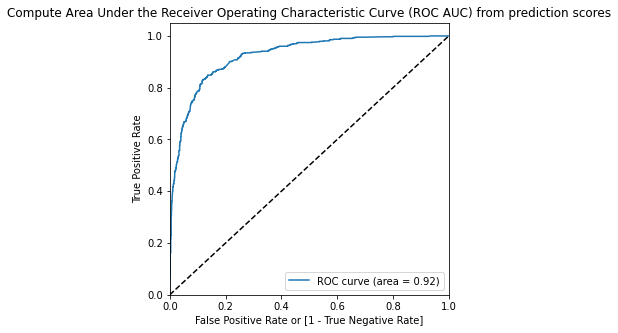

"It's been tested that the ROC AUC score is high, it means my algorithm does a good job at \n*ranking* the test data, with most negative cases at one end of a scale and positive cases at the other."

In [47]:

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt


def roc_plot(y_test, probs):
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    score = roc_auc_score(y_test, probs)
    print('roc auc score is:',score)
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores')
    plt.legend(loc="lower right")
    plt.show()


fpr, tpr, thresholds = roc_curve(pred_summary['Conversion RealValue'], pred_summary['Lead Scoring'])

roc_plot(pred_summary['Conversion RealValue'], pred_summary['Lead Scoring'])


'''It's been tested that the ROC AUC score is high, it means my algorithm does a good job at 
*ranking* the test data, with most negative cases at one end of a scale and positive cases at the other.'''


## 5.4 Rank the most important features

In [48]:
from sklearn.feature_selection import RFE

predictors=X_train_scaling
selector=RFE(modelLR_scal,n_features_to_select=1)
selector=selector.fit(predictors,y_train)

order=selector.ranking_
print(order)


feature_ranks=[]
for i in order:
    feature_ranks.append(f'{i}.{X.columns[list(order).index(i)]}')

feature_ranks


# Sort the features based on the ranking
import re

def natural_key(string_):
    return [int(s) if s.isdigit() else s for s in re.split(r'(\d+)', string_) if s]

sorted(feature_ranks, key=natural_key)


[14 28 26  4 21 63 66 48 65 27 49 56 46  9 32 10 11 57 13 18  5 19 22 30
 40 36 60 12 31 39 29 45 33 25 54 51 61 55 62 53 50 43 64 47 52 41 44 59
 58 38 23 17  8 15  7  2  3  1 35 16 34 37 20  6 24 42]


['1.Lead Quality_Worst',
 '2.Lead Quality_No answer',
 '3.Lead Quality_Not Sure',
 '4.Total Time Spent on Website',
 '5.Lead Source_Welingak Website',
 '6.Last Notable Activity_SMS Sent',
 '7.Lead Quality_Might be',
 '8.What is your current occupation_Working Professional',
 '9.Lead Source_Direct Traffic',
 '10.Lead Source_Google',
 '11.Lead Source_Organic Search',
 '12.Last Activity_Olark Chat Conversation',
 '13.Lead Source_Reference',
 '14.Do Not Email',
 '15.Lead Quality_Low in Relevance',
 '16.Last Notable Activity_Had a Phone Conversation',
 '17.What is your current occupation_Unemployed',
 '18.Lead Source_Referral Sites',
 '19.Last Activity_Converted to Lead',
 '20.Last Notable Activity_Other',
 '21.Page Views Per Visit',
 '22.Last Activity_Email Bounced',
 '23.What is your current occupation_Student',
 '24.Last Notable Activity_Unreachable',
 '25.Country_Other country',
 '26.TotalVisits',
 '27.Digital Advertisement',
 '28.Do Not Call',
 '29.Last Activity_Unreachable',
 '30.Last